# Small tutorial on reading NetCDF files using xarray


In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
norkyst_url = 'https://thredds.met.no/thredds/dodsC/fou-hi/norkyst800m-1h/NorKyst-800m_ZDEPTHS_his.an.2019071600.nc'
barents_url = "https://thredds.met.no/thredds/dodsC/fou-hi/barents_eps_zdepth/barents_zdepth_20220715T00Zm00_AN.nc"

# If you download the file from thredds you can also give a local filename:
# barents_file = "netcdf_cache/barents_zdepth_20230319T00Zm00_AN.nc"

In [3]:
ds = xr.open_dataset(barents_url)
ds

<xarray.Dataset>
Dimensions:                  (s_rho: 42, s_w: 43, X: 739, Y: 949, depth: 16, time: 24)
Coordinates:
  * X                        (X) float32 2.786e+05 2.811e+05 ... 2.124e+06
  * Y                        (Y) float32 -8.979e+05 -8.954e+05 ... 1.472e+06
  * depth                    (depth) float64 0.0 3.0 10.0 ... 1e+03 2e+03 3e+03
  * time                     (time) datetime64[ns] 2022-07-15 ... 2022-07-15T...
    lat                      (Y, X) float64 ...
    lon                      (Y, X) float64 ...
Dimensions without coordinates: s_rho, s_w
Data variables: (12/21)
    Cs_r                     (s_rho) float64 ...
    Cs_w                     (s_w) float64 ...
    forecast_reference_time  datetime64[ns] ...
    hc                       float64 ...
    projection_lambert       int32 ...
    AKs                      (time, depth, Y, X) float32 ...
    ...                       ...
    sea_mask                 (Y, X) float64 ...
    temperature              (time, depth, Y, X) float32 ...
    u                        (time, depth, Y, X) float32 ...
    v                        (time, depth, Y, X) float32 ...
    w                        (time, depth, Y, X) float32 ...
    zeta                     (time, Y, X) float32 ...
Attributes: (12/33)
    file:                            /lustre/storeB/project/fou/hi/run/ecf-pr...
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS history file
    title:                           Barents-2.5km - ROMS
    var_info:                        /home/havis/sea/ROMS/metroms_apps/barent...
    rst_file:                        /lustre/storeB/project/fou/hi/run/ecf-pr...
    ...                              ...
    ana_file:                        ROMS/Functionals/ana_btflux.h, ROMS/Func...
    CPP_options:                     BARENTS, ADD_FSOBC, ADD_M2OBC, ALBEDO, A...
    DAinfo_EnKF:                     \nDA_DAY            "6567.0 days since 1...
    history:                         Fri Jul 15 12:11:32 2022: ncks -O -d tim...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    DODS_EXTRA.Unlimited_Dimension:  time

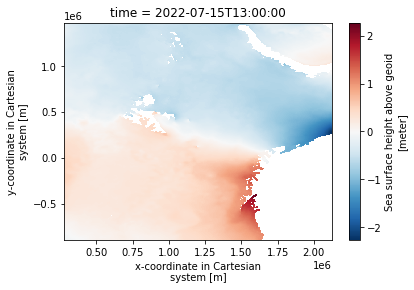

In [4]:
ds.zeta.isel(time=13).plot()


<class 'numpy.ndarray'>


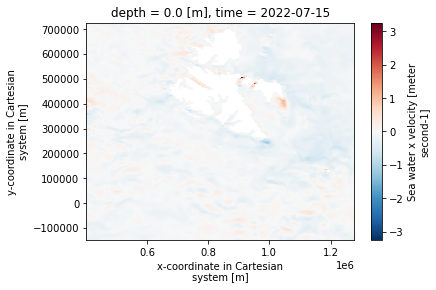

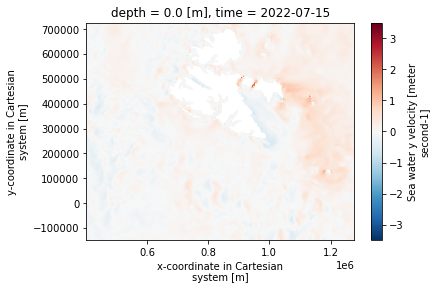

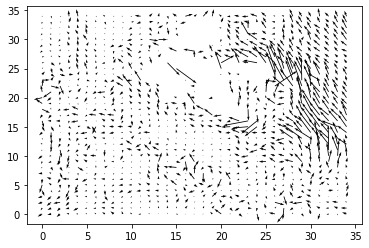

In [5]:
x0, x1 = 50, 400
y0, y1 = 300, 650


ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()
plt.figure()
ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).plot()

print(type(ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data))

plt.figure()
plt.quiver(ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10, ::10],
           ds.v.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data[::10,::10])

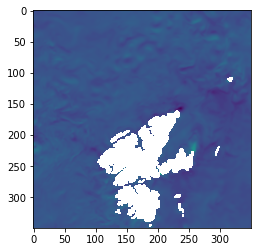

In [11]:
u = ds.u.isel(depth=0, time=0, X=slice(x0,x1), Y=slice(y0, y1)).data
plt.imshow(u)

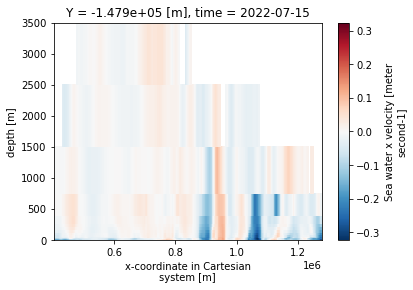

In [6]:
ds.u.isel(time=0, X=slice(x0,x1), Y=y0).plot()


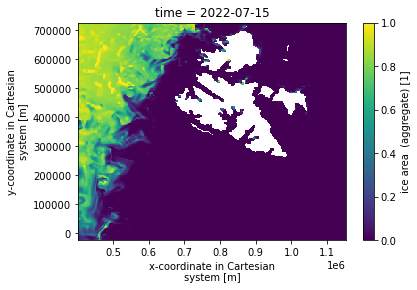

In [7]:
ds.ice_concentration.isel(time=0, X=slice(50,350), Y=slice(350,650)).plot()



In [8]:
ds.sea_mask.data

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

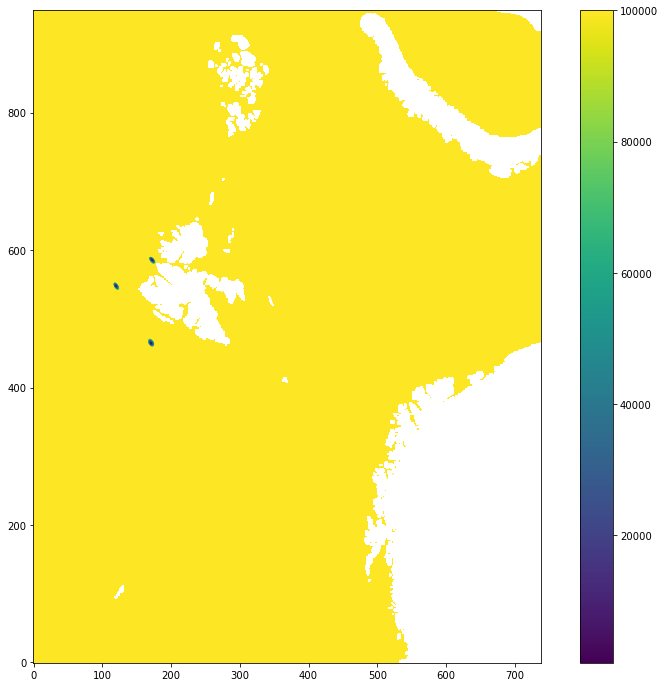

In [54]:
def latlon2xy(ds, lat0, lon0, lat1=None, lon1=None, mask=False):
    dslon = ds.lon.data
    dslat = ds.lat.data
    field = (dslon - lon0)**2 + 10*(dslat - lat0)**2
    if lat1 and lon1:
        field = field*((dslon-lon1)**2 + 10*(dslat-lat1)**2)* \
                      ((dslon-lon0)**2 + 10*(dslat-lat1)**2)* \
                      ((dslon-lon1)**2 + 10*(dslat-lat0)**2)
                       
    if mask:
        field = np.ma.masked_array(field, mask=-1*(ds.sea_mask.data - 1))
    return field

plt.figure(figsize=(14, 12))
plt.imshow(latlon2xy(ds, 80.26182, 15.9739, 78.06542, 7.354722, mask=True), origin='lower', vmax=100000)
plt.colorbar()

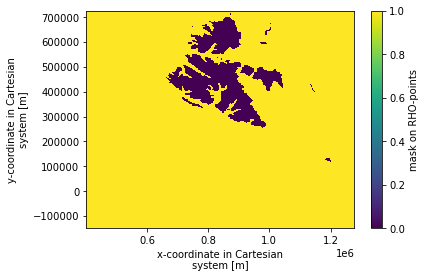

In [9]:
plt.figure()
ds.sea_mask.isel(X=slice(x0,x1), Y=slice(y0, y1)).plot()

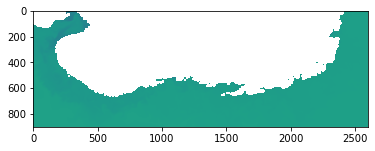

In [12]:
ds = xr.open_dataset(norkyst_url)
salt = ds.salinity.isel(depth=0, time=0)
plt.imshow(salt)

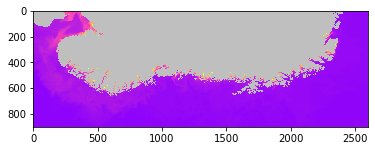

In [24]:
cmap = plt.cm.gnuplot2_r
import copy
cmap = copy.copy(cmap)
cmap.set_bad("grey", alpha=0.5)

mask = np.isnan(salt)
plt.imshow(salt, interpolation="None", cmap=cmap)


In [ ]:
base = 